In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv(dotenv_path="C:/Users/lesli/Jupyter-Workspace/05-APIs Class 2 (18 June)/.env")

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
alpaca_api_key

'PKMXSCQQB4668UR5CHKA'

In [5]:
alpaca_secret_key

'nF06gawqWsC8YpSUQS4UDHyWmX0J5rYhHzKA0Zm3'

In [6]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [7]:
# Format  date as ISO format
start_date = pd.Timestamp("2017-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()

In [8]:
# Set the tickers
tickers = ['ENB', 'ATH.TO', 'NVA.TO', 'TVE', 'CNR', 'CP', 'BNS', 'TRI', 'BCE', 'ATD.TO']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-01-03 05:00:00+00:00,43.35,43.635,43.2100,43.4700,1015777,7843,43.469485,BCE
2017-01-04 05:00:00+00:00,43.64,44.100,43.6400,44.0800,781131,6318,43.975035,BCE
2017-01-05 05:00:00+00:00,44.17,44.680,44.0800,44.5000,1073243,8061,44.538528,BCE
2017-01-06 05:00:00+00:00,44.49,44.610,44.1750,44.2600,928130,7340,44.377277,BCE
2017-01-09 05:00:00+00:00,43.85,43.990,43.6500,43.7900,1133600,8854,43.824584,BCE
...,...,...,...,...,...,...,...,...
2021-12-27 05:00:00+00:00,25.47,25.750,25.4700,25.6000,25220,257,25.616451,TVE
2021-12-28 05:00:00+00:00,25.60,25.685,25.6000,25.6697,11003,45,25.628490,TVE
2021-12-29 05:00:00+00:00,25.74,25.790,25.5300,25.7800,11765,118,25.721944,TVE


In [9]:
# Reorganizing the DataFrame df_portfolio
#tickers = ['ENB', 'ATH.TO', 'NVA.TO', 'TVE', 'CNR', 'CP', 'BNS', 'TRI', 'BCE', 'ATD.TO']

# Separate ticker data
ENB = df_portfolio[df_portfolio['symbol']=='ENB'].drop('symbol', axis=1)
ATHTO = df_portfolio[df_portfolio['symbol']=='ATH.TO'].drop('symbol', axis=1)
NVATO = df_portfolio[df_portfolio['symbol']=='NVA.TO'].drop('symbol', axis=1)
TVE = df_portfolio[df_portfolio['symbol']=='TVE'].drop('symbol', axis=1)
CNR = df_portfolio[df_portfolio['symbol']=='CNR'].drop('symbol', axis=1)
CP = df_portfolio[df_portfolio['symbol']=='CP'].drop('symbol', axis=1)
BNS = df_portfolio[df_portfolio['symbol']=='BNS'].drop('symbol', axis=1)
TRI = df_portfolio[df_portfolio['symbol']=='TRI'].drop('symbol', axis=1)
BCE = df_portfolio[df_portfolio['symbol']=='BCE'].drop('symbol', axis=1)
ATDTO = df_portfolio[df_portfolio['symbol']=='ATD.TO'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([ENB,ATHTO,NVATO,TVE,CNR,CP,BNS,TRI,BCE,ATDTO],axis=1, keys=['ENB', 'ATH.TO', 'NVA.TO', 'TVE', 'CNR', 'CP', 'BNS', 'TRI', 'BCE', 'ATD.TO'])

# Display sample data of concatenated Dataframe
df_portfolio

ENB                                    \
                            open     high      low  close   volume   
timestamp                                                            
2017-01-03 05:00:00+00:00  42.46  42.8700  42.3100  42.54  2124989   
2017-01-04 05:00:00+00:00  42.67  43.2300  42.5600  42.84  2373616   
2017-01-05 05:00:00+00:00  42.96  43.4100  42.8700  43.34  2339635   
2017-01-06 05:00:00+00:00  43.35  43.6300  43.1600  43.61  1598786   
2017-01-09 05:00:00+00:00  43.37  43.8200  43.1350  43.45  2084809   
...                          ...      ...      ...    ...      ...   
2021-12-27 05:00:00+00:00  38.10  38.4594  37.8600  38.44  2577516   
2021-12-28 05:00:00+00:00  38.48  38.5750  38.2400  38.30  2269194   
2021-12-29 05:00:00+00:00  38.30  38.4600  38.1150  38.39  3078509   
2021-12-30 05:00:00+00:00  38.44  38.7600  38.4300  38.65  3304644   
2021-12-31 05:00:00+00:00  38.77  39.1300  38.6841  39.08  3779309   

                                                 ATH.TO           ...  \
                          trade_count       vwap   open high low  ...   
timestamp                                                         ...   
2017-01-03 05:00:00+00:00       16970  42.578771    NaN  NaN NaN  ...   
2017-01-04 05:00:00+00:00       16964  42.923171    NaN  NaN NaN  ...   
2017-01-05 05:00:00+00:00       18002  43.172401    NaN  NaN NaN  ...   
2017-01-06 05:00:00+00:00       12753  43.411556    NaN  NaN NaN  ...   
2017-01-09 05:00:00+00:00       16158  43.568889    NaN  NaN NaN  ...   
...                               ...        ...    ...  ...  ..  ...   
2021-12-27 05:00:00+00:00       18514  38.248073    NaN  NaN NaN  ...   
2021-12-28 05:00:00+00:00       14973  38.359371    NaN  NaN NaN  ...   
2021-12-29 05:00:00+00:00       20815  38.300311    NaN  NaN NaN  ...   
2021-12-30 05:00:00+00:00       21991  38.652453    NaN  NaN NaN  ...   
2021-12-31 05:00:00+00:00       23097  38.895789    NaN  NaN NaN  ...   

                               BCE                        ATD.TO           \
                            volume trade_count       vwap   open high low   
timestamp                                                                   
2017-01-03 05:00:00+00:00  1015777        7843  43.469485    NaN  NaN NaN   
2017-01-04 05:00:00+00:00   781131        6318  43.975035    NaN  NaN NaN   
2017-01-05 05:00:00+00:00  1073243        8061  44.538528    NaN  NaN NaN   
2017-01-06 05:00:00+00:00   928130        7340  44.377277    NaN  NaN NaN   
2017-01-09 05:00:00+00:00  1133600        8854  43.824584    NaN  NaN NaN   
...                            ...         ...        ...    ...  ...  ..   
2021-12-27 05:00:00+00:00   434452        4169  51.623586    NaN  NaN NaN   
2021-12-28 05:00:00+00:00   552236        5489  51.648797    NaN  NaN NaN   
2021-12-29 05:00:00+00:00   655847        7295  51.467164    NaN  NaN NaN   
2021-12-30 05:00:00+00:00   697727        6936  51.634800    NaN  NaN NaN   
2021-12-31 05:00:00+00:00   712777        7263  52.020574    NaN  NaN NaN   

                                                         
                          close volume trade_count vwap  
timestamp                                                
2017-01-03 05:00:00+00:00   NaN    NaN         NaN  NaN  
2017-01-04 05:00:00+00:00   NaN    NaN         NaN  NaN  
2017-01-05 05:00:00+00:00   NaN    NaN         NaN  NaN  
2017-01-06 05:00:00+00:00   NaN    NaN         NaN  NaN  
2017-01-09 05:00:00+00:00   NaN    NaN         NaN  NaN  
...                         ...    ...         ...  ...  
2021-12-27 05:00:00+00:00   NaN    NaN         NaN  NaN  
2021-12-28 05:00:00+00:00   NaN    NaN         NaN  NaN  
2021-12-29 05:00:00+00:00   NaN    NaN         NaN  NaN  
2021-12-30 05:00:00+00:00   NaN    NaN         NaN  NaN  
2021-12-31 05:00:00+00:00   NaN    NaN         NaN  NaN  

[1259 rows x 70 columns]

In [10]:
#Import MCSimulation
from MCForecastTools import MCSimulation

In [14]:
# Set number of simulations to 500 and equal weights to all stocks 
num_sims = 500
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
mc_portfolio = MCSimulation(
    portfolio_data = df_portfolio,
    weights = weights,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [15]:
# Run Monte Carlo simulations to forecast 30 years cumulative returns
mc_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7557,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7558,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7559,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


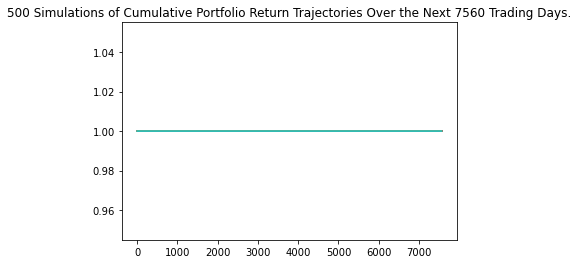

In [16]:
# Plot simulation outcomes
sim_plot = mc_portfolio.plot_simulation()

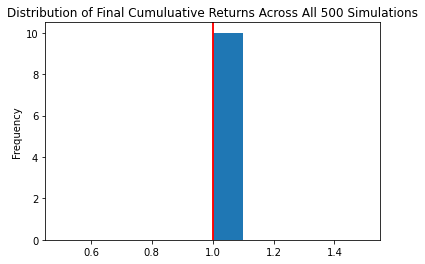

In [17]:
# Plot probability distribution and confidence intervals
dist_plot = mc_portfolio.plot_distribution()

In [18]:
# Retirement Analysis

# summary statistics for the Monte Carlo simulation
portfolio_summary = mc_portfolio.summarize_cumulative_return()

# Print summary statistics
print(portfolio_summary)

count           500.0
mean              1.0
std               0.0
min               1.0
25%               1.0
50%               1.0
75%               1.0
max               1.0
95% CI Lower      1.0
95% CI Upper      1.0
Name: 7560, dtype: float64


In [19]:
# Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
portfolio_ci_lower = round(portfolio_summary[8]*20000,2)
portfolio_ci_upper = round(portfolio_summary[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${portfolio_ci_lower} and ${portfolio_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $20000.0 and $20000.0
